In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [15]:
class Bandit:
    def __init__(self, k=10, exp_rate=0.3, lr=0.1, seed=None):
        self.k = k
        self.actions = range(self.k)
        self.exp_rate = exp_rate
        self.lr = lr
        self.total_reward = 0
        self.avg_reward = []

        self.TrueValue = []

        # Initialize true mean (Expectation for different actions)
        np.random.seed(seed)
        for i in range(self.k):
            self.TrueValue.append(np.random.randn() + 2) # normal distribution

        self.values = np.zeros(self.k)
        self.times = 0
        self.action_times = np.zeros(self.k)

    # choose action based on epsilon value

    def chooseAction(self):
        # explore
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # exploit
            action = np.argmax(self.values)
        return action

    # receives an action and updates estimates of that action after receiving a reward

    def takeAction(self, action):
        self.times += 1
        self.action_times[action] += 1
        # take action and update value estimates
        # reward = self.TrueValue[action]
        reward = np.random.randn() + self.TrueValue[action] # add randomness to reward
        # using incremental method to propagate
        self.values[action] += self.lr * (reward - self.values[action])
        # look like fixed lr converges better

        self.total_reward += reward
        self.avg_reward.append(self.total_reward / self.times)

    # play the bandit n number of times

    def play(self, n):
        for _ in range(n):
            action = self.chooseAction()
            self.takeAction(action)



Estimated values [2.11534735 0.         0.         0.         0.        ]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]
Estimated values [2.6600613  0.65143855 3.80596176 2.25201666 1.16469527]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]
Estimated values [2.7628491  1.05773988 3.17271223 2.05634367 1.15629975]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]
Estimated values [2.54927187 0.84413741 3.34851036 1.89580542 1.56265398]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


<IPython.core.display.Javascript object>


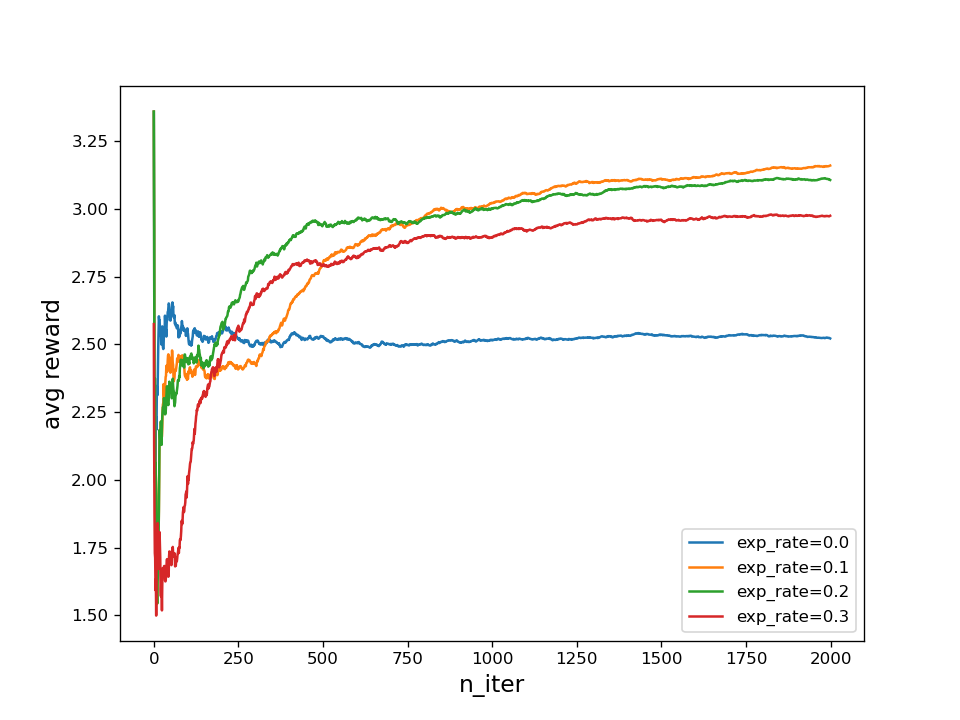

In [16]:
# multiple exploration rate

bdt = Bandit(k=5, exp_rate=0.0, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)
avg_reward1 = bdt.avg_reward

bdt = Bandit(k=5, exp_rate=0.1, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward2 = bdt.avg_reward

bdt = Bandit(k=5, exp_rate=0.2, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward3 = bdt.avg_reward

bdt = Bandit(k=5, exp_rate=0.3, seed=1234)
bdt.play(2000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward4 = bdt.avg_reward

# reward plot
plt.figure(figsize=[8, 6])
plt.plot(avg_reward1, label="exp_rate=0.0")
plt.plot(avg_reward2, label="exp_rate=0.1")
plt.plot(avg_reward3, label="exp_rate=0.2")
plt.plot(avg_reward4, label="exp_rate=0.3")

plt.xlabel("n_iter", fontsize=14)
plt.ylabel("avg reward", fontsize=14)
plt.legend()

Estimated values [2.28201751 0.92147647 3.4815199  2.07791984 1.4281963 ]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]
Estimated values [2.33458062 0.9699336  3.42351849 1.8114572  1.49314829]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]
Estimated values [2.50878832 1.03059988 3.34609666 1.56457092 1.43519333]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]
Estimated values [2.48509946 0.97896835 3.40817334 1.53112763 1.32685181]
Actual values [2.471435163732493, 0.8090243052935355, 3.432706968426097, 1.6873481039082872, 1.2794112666349884]


<IPython.core.display.Javascript object>


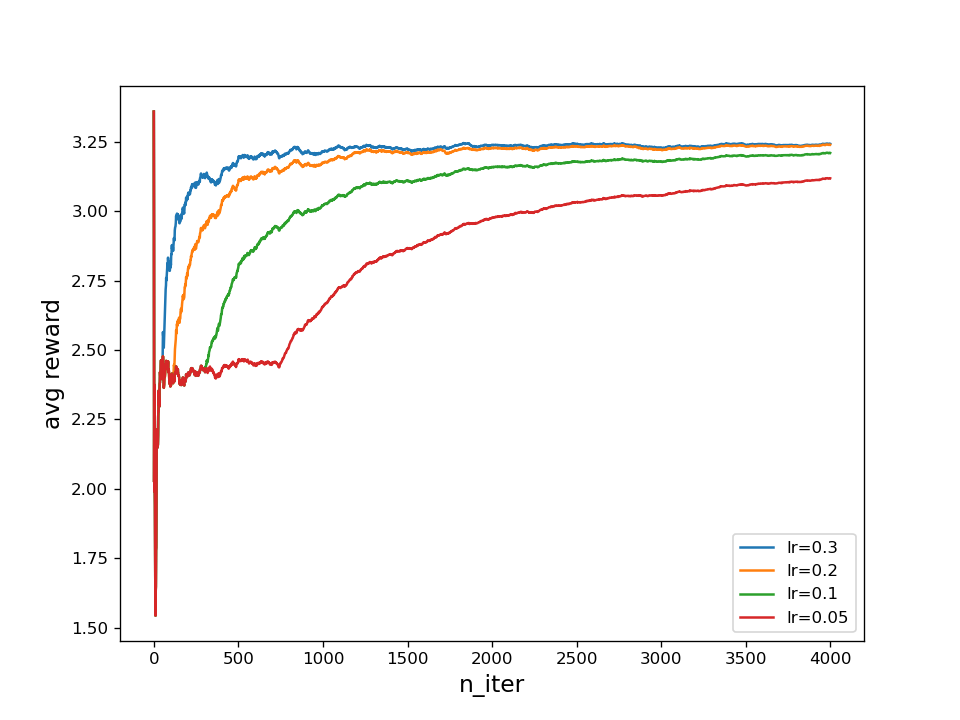

In [18]:
# multiple learning rates

bdt = Bandit(k=5, exp_rate=0.1, lr = 0.3, seed=1234)
bdt.play(4000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)
avg_reward1 = bdt.avg_reward

bdt = Bandit(k=5, exp_rate=0.1, lr = 0.2, seed=1234)
bdt.play(4000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward2 = bdt.avg_reward

bdt = Bandit(k=5, exp_rate=0.1, lr = 0.1, seed=1234)
bdt.play(4000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward3 = bdt.avg_reward

bdt = Bandit(k=5, exp_rate=0.1, lr=0.05, seed=1234)
bdt.play(4000)

print("Estimated values", bdt.values)
print("Actual values", bdt.TrueValue)

avg_reward4 = bdt.avg_reward

# reward plot
plt.figure(figsize=[8, 6])
plt.plot(avg_reward1, label="lr=0.3")
plt.plot(avg_reward2, label="lr=0.2")
plt.plot(avg_reward3, label="lr=0.1")
plt.plot(avg_reward4, label="lr=0.05")

plt.xlabel("n_iter", fontsize=14)
plt.ylabel("avg reward", fontsize=14)
plt.legend()